<a href="https://colab.research.google.com/github/zhousanfu/machine-learning-demo/blob/master/%E8%A5%BF%E5%82%A8%E5%A4%A7%E5%AD%A6%E8%BD%B4%E6%89%BF%E6%95%85%E9%9A%9C%E6%95%B0%E6%8D%AE%E5%88%86%E7%B1%BB_MK_MMD%E5%BA%A6%E9%87%8F%E8%BF%81%E7%A7%BB%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数据集说明




[西储大学滚动轴承数据集简介](https://blog.csdn.net/Adonisyc/article/details/124933902?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522167720991316782425148081%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fblog.%2522%257D&request_id=167720991316782425148081&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~blog~first_rank_ecpm_v1~rank_v31_ecpm-1-124933902-null-null.blog_rank_default&utm_term=12k%20drive%20end%20bearing&spm=1018.2226.3001.4450)

DE - 驱动端加速计数据

FE - 风扇端加速计数据

BA - 基础加速计数据

time - 时间序列数据

RPM - 测试期间的RPM

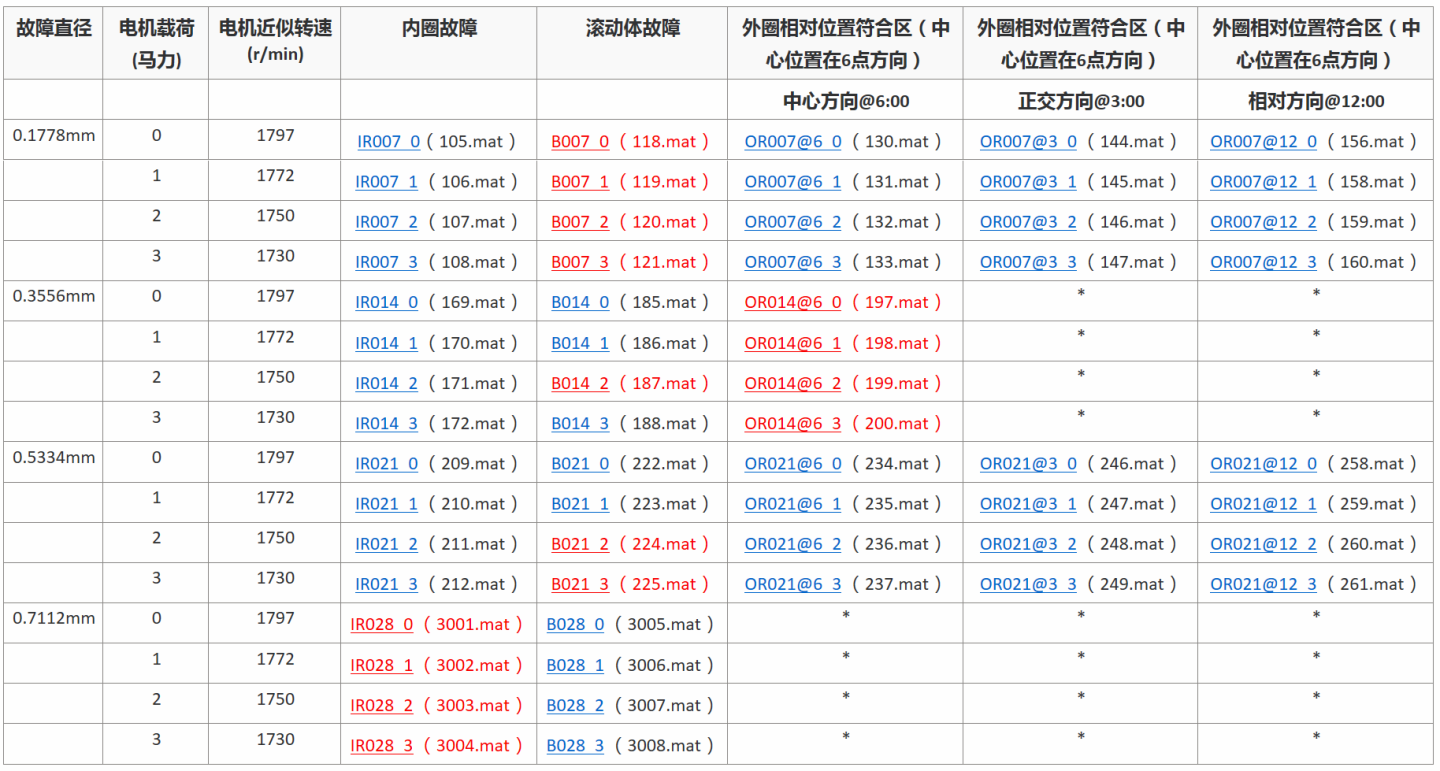


# 数据处理

In [ ]:
!cp /content/drive/MyDrive/Data/CRWU凯斯西储大学轴承数据.rar CRWU凯斯西储大学轴承数据.rar
!unrar x CRWU凯斯西储大学轴承数据.rar

!mkdir /content/data
!mkdir data_train data_test
!cp "/content/CRWU/Normal Baseline/normal_3.mat" /content/data/normal_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Ball/0007/B007_3.mat" /content/data/B007_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Ball/0014/B014_3.mat" /content/data/B014_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Ball/0021/B021_3.mat" /content/data/B021_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Inner Race/0007/IR007_3.mat" /content/data/IR007_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Inner Race/0014/IR014_3.mat" /content/data/IR014_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Inner Race/0021/IR021_3.mat" /content/data/IR021_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Outer Race/Centered/0007/OR007@6_3.mat" /content/data/OR007@6_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Outer Race/Centered/0014/OR014@6_3.mat" /content/data/OR014@6_3.mat
!cp "/content/CRWU/12k Drive End Bearing Fault Data/Outer Race/Centered/0021/OR021@6_3.mat" /content/data/OR021@6_3.mat

In [45]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as scio
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



# 滑动窗口截取时间序列数据
def slide_window(rows, sw_width, sw_steps):   # rows(序列长度)，sw_width(样本长度)，sw_steps(滑动步长)
    start = 0
    s_num = (rows - sw_width) // sw_steps     # 计算滑动次数
    new_rows = sw_width + (sw_steps * s_num)  # 完整窗口包含的行数，丢弃少于窗口宽度的采样数据；
    while True:
        if (start + sw_width) > new_rows:     # 如果窗口结束索引超出最大索引，结束截取；
            return
        yield start, start + sw_width
        start += sw_steps

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

def normalize(data):
    s = (data-min(data)) / (max(data)-min(data))
 
    return  s

def readmat(path, sample_len, sw_steps, name="_DE_time"):
    data ,labels, label = [], [], {}

    con = 0
    for filename in os.listdir(path):
        if '.mat' in filename:
            label[filename.split('_')[0]] = con
            con += 1
    print(label)

    for filename in os.listdir(path):
        if '.mat' in filename:
            d = scio.loadmat(path + '/' + filename)
            dn = [dn for dn in d.keys() if name in dn]                                  # 获取键名
            # print(d[dn[0]].shape, d[dn[0]][0], dn)

            for start, end in slide_window(d[dn[0]].shape[0], sample_len, sw_steps):    # 滑动截取
                data.append(d[dn[0]][start:end])
                labels.append(label[filename.split('_')[0]])

    data, labels = np.array(data), np.array(labels)
    data = data.reshape(data.shape[0], sample_len)

    return data, labels


sample_len = 2048       #样本长度
sw_steps = 128          #滑动步长
name = '_DE_time'

# # 加载数据
X, Y = readmat('data', sample_len, sw_steps, name)
print('-data:      ', X.shape, Y.shape)

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = to_one_hot(Y)
print('-归一化:     ', X.shape, Y.shape)

# 数据切割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, Y_train.shape, '\n', X_test.shape, Y_test.shape)

{'OR014@6': 0, 'B021': 1, 'IR014': 2, 'IR007': 3, 'IR021': 4, 'B014': 5, 'B007': 6, 'OR021@6': 7, 'OR007@6': 8, 'normal': 9}
-data:       (12227, 2048) (12227,)
-归一化:      (12227, 2048) (12227, 10)
(8558, 2048) (8558, 10) 
 (3669, 2048) (3669, 10)


In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #使用GPU1
tf.keras.backend.clear_session()


model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(2048, 2048, 1), activation='relu'))    # 输入维度为3，取图片的后三维
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))  #下采样，降低参数数量，同时增强下一层卷积的视野
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())    #把卷积之后的图片转换为2维，连到全连接层
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
          
model.summary()

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
    )

history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    validation_split=0.2,
    # validation_data=(X_test, y_test),
    verbose=1,
    # callbacks=[early_stop]
    )

plt.figure(figsize=(20,8),dpi = 200)
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

# 设置随机种子以便复现
tf.random.set_seed(2021)

# 加载数据
# 这里以MNIST数据集为例，数据集中的图片都是28x28的灰度图像
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 预处理数据
# 将像素值缩放到0~1之间，并将数据变形为Conv1D可以接受的形状
x_train = x_train.reshape(-1, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 1) / 255.0

# 构建模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(28, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))



# MMD

In [7]:
import random
import numpy as np
import scipy.io as scio
from sklearn import preprocessing
from keras.utils import np_utils

def deal_data(data,length,label):
    data = np.reshape(data,(-1))
    num = len(data)//length
    data = data[0:num*length]

    data = np.reshape(data,(num,length))

    min_max_scaler = preprocessing.MinMaxScaler()

    data = min_max_scaler.fit_transform(np.transpose(data,[1,0]))
    data = np.transpose(data,[1,0])
    label = np.ones((num,1))*label
    return np.column_stack((data,label))

def open_data(bath_path,key_num):
    path = bath_path + str(key_num) + ".mat"
    str1 =  "X" + "%03d"%key_num + "_DE_time"
    data = scio.loadmat(path)
    data = data[str1]
    return data

def split_data(data,split_rate):
    length = len(data)
    num1 = int(length*split_rate[0])
    num2 = int(length*split_rate[1])

    index1 = random.sample(range(num1),num1)
    train = data[index1]
    data = np.delete(data,index1,axis=0)
    index2 = random.sample(range(num2),num2)
    eval = data[index2]
    test = np.delete(data,index2,axis=0)
    return train,eval,test

def load_data(bath_path1, bath_path2, num = 90,length = 1280,hp = [0,1,2],fault_diameter = [0.007,0.028], split_rate = [0.7,0.2,0.1]):
    #num 为每类故障样本数量，length为样本长度，hp为负载大小，可取[0,1,2,3],fauit_diameter为故障程度，可取[0.007,0.014,0.021]
    #split_rate为训练集，验证集和测试集划分比例。取值从0-1。
    #bath_path1 为西储大学数据集中，正常数据的文件夹路径
    #bath_path2 为西储大学数据集中，12K采频数据的文件夹路径
    data_list = []
    label = 0
    for i in hp:
        #正常数据
        #path1 = bath_path1 + str(97+i) + ".mat"
        #normal_data = scio.loadmat(path1)
        #str1 = "X0" + str(97+i) + "_DE_time"
        normal_data = open_data(bath_path1,97+i)
        data = deal_data(normal_data,length,label = label)
        data_list.append(data)
        #故障数据
        for j in fault_diameter:
            if j == 0.007:
                inner_num = 105
                ball_num = 118
                outer_num = 130
            elif j == 0.014:
                inner_num = 169
                ball_num = 185
                outer_num = 197
            else:
                inner_num = 209
                ball_num = 222
                outer_num = 234

            inner_data = open_data(bath_path2,inner_num + i)
            inner_data = deal_data(inner_data,length,label + 1)
            data_list.append(inner_data)

            ball_data = open_data(bath_path2,ball_num + i)
            ball_data = deal_data(ball_data,length,label + 2)
            data_list.append(ball_data)

            outer_data = open_data(bath_path2,outer_num + i)
            outer_data = deal_data(outer_data,length,label + 3)
            data_list.append(outer_data)

        label = label + 4

    #保持每类数据数据量相同
    num_list = []
    for i in data_list:
        num_list.append(len(i))
    min_num = min(num_list)

    if num > min_num:
        print("每类数量超出上限，最大数量为：%d" %min_num)

    min_num = min(num,min_num)
    #划分训练集，验证集和测试集，并随机打乱顺序
    train = []
    eval = []
    test = []
    for data in data_list:
        data = data[0:min_num,:]
        a,b,c = split_data(data,split_rate)
        train.append(a)
        eval.append(b)
        test.append(c)

    train = np.reshape(train,(-1,length+1))
    train = train[random.sample(range(len(train)),len(train))]
    train_data = train[:,0:length]
    train_label = np_utils.to_categorical(train[:,length],len(hp)*(1+3*len(fault_diameter)))

    eval = np.reshape(eval,(-1,length+1))
    eval = eval[random.sample(range(len(eval)),len(eval))]
    eval_data = eval[:,0:length]
    eval_label = np_utils.to_categorical(eval[:,length],len(hp)*(1+3*len(fault_diameter)))

    test = np.reshape(test,(-1,length+1))
    test = test[random.sample(range(len(test)),len(test))]
    test_data = test[:,0:length]
    test_label = np_utils.to_categorical(test[:,length],len(hp)*(1+3*len(fault_diameter)))



    return train_data,train_label,eval_data,eval_label,test_data,test_label


bath_path1 = r"/content/CRWU/Normal Baseline"
bath_path2 = r"/content/CRWU/12k Drive End Bearing Fault Data"
train_data,train_label,eval_data,eval_label,test_data,test_label = load_data(bath_path1=bath_path1, bath_path2=bath_path2)
train_data

FileNotFoundError: ignored

In [ ]:
import numpy as np
from sklearn import metrics
 
 
def mmd_linear(X, Y):
    """MMD using linear kernel (i.e., k(x,y) = <x,y>)
    Note that this is not the original linear MMD, only the reformulated and faster version.
    The original version is:
        def mmd_linear(X, Y):
            XX = np.dot(X, X.T)
            YY = np.dot(Y, Y.T)
            XY = np.dot(X, Y.T)
            return XX.mean() + YY.mean() - 2 * XY.mean()
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Returns:
        [scalar] -- [MMD value]
    """
    delta = X.mean(0) - Y.mean(0)
    return delta.dot(delta.T)
 
 
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
 
 
def mmd_poly(X, Y, degree=2, gamma=1, coef0=0):
    """MMD using polynomial kernel (i.e., k(x,y) = (gamma <X, Y> + coef0)^degree)
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        degree {int} -- [degree] (default: {2})
        gamma {int} -- [gamma] (default: {1})
        coef0 {int} -- [constant item] (default: {0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.polynomial_kernel(X, X, degree, gamma, coef0)
    YY = metrics.pairwise.polynomial_kernel(Y, Y, degree, gamma, coef0)
    XY = metrics.pairwise.polynomial_kernel(X, Y, degree, gamma, coef0)
    return XX.mean() + YY.mean() - 2 * XY.mean()
 
 
if __name__ == '__main__':
    a = np.arange(1, 10).reshape(3, 3)
    b = [[7, 6, 5], [4, 3, 2], [1, 1, 8], [0, 2, 5]]
    b = np.array(b)
    print(a)
    print(b)
    print(mmd_linear(a, b))  # 6.0
    print(mmd_rbf(a, b))  # 0.5822
    print(mmd_poly(a, b))  # 2436.5


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[7 6 5]
 [4 3 2]
 [1 1 8]
 [0 2 5]]
6.0
0.5822068619587334
2436.5


In [ ]:
 
def guassian_kernel(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    多核或单核高斯核矩阵函数，根据输入样本集x和y，计算返回对应的高斯核矩阵
    Params:
     source: (b1,n)的X分布样本数组
     target:（b2，n)的Y分布样本数组
     kernel_mul: 多核MMD，以bandwidth为中心，两边扩展的基数，比如bandwidth/kernel_mul, bandwidth, bandwidth*kernel_mul
     kernel_num: 取不同高斯核的数量
     fix_sigma: 是否固定，如果固定，则为单核MMD
    Return:
      sum(kernel_val): 多个核矩阵之和
    '''
    # 堆叠两组样本，上面是X分布样本，下面是Y分布样本，得到（b1+b2,n）组总样本
    n_samples = int(source.shape[0]) + int(target.shape[0])
    total = np.concatenate((source, target), axis=0)
    # 对总样本变换格式为（1,b1+b2,n）,然后将后两维度数据复制到新拓展的维度上（b1+b2，b1+b2,n），相当于按行复制
    total0 = np.expand_dims(total, axis=0)
    total0 = np.broadcast_to(total0, [int(total.shape[0]), int(total.shape[0]), int(total.shape[1])])
    # 对总样本变换格式为（b1+b2,1,n）,然后将后两维度数据复制到新拓展的维度上（b1+b2，b1+b2,n），相当于按复制
    total1 = np.expand_dims(total, axis=1)
    total1 = np.broadcast_to(total1, [int(total.shape[0]), int(total.shape[0]), int(total.shape[1])])
    # total1 - total2 得到的矩阵中坐标（i,j, :）代表total中第i行数据和第j行数据之间的差
    # sum函数，对第三维进行求和，即平方后再求和，获得高斯核指数部分的分子，是L2范数的平方
    L2_distance_square = np.cumsum(np.square(total0 - total1), axis=2)
    # 调整高斯核函数的sigma值
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = np.sum(L2_distance_square) / (n_samples ** 2 - n_samples)
    # 多核MMD
    # 以fix_sigma为中值，以kernel_mul为倍数取kernel_num个bandwidth值（比如fix_sigma为1时，得到[0.25,0.5,1,2,4]
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * (kernel_mul ** i) for i in range(kernel_num)]
    # print(bandwidth_list)
    # 高斯核函数的数学表达式
    kernel_val = [np.exp(-L2_distance_square / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    # 得到最终的核矩阵
    return sum(kernel_val)  # 多核合并
 
 
def MK_MMD(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    计算源域数据和目标域数据的MMD距离
    Params:
     source: (b1,n)的X分布样本数组
     target:（b2，n)的Y分布样本数组
     kernel_mul: 多核MMD，以bandwidth为中心，两边扩展的基数，比如bandwidth/kernel_mul, bandwidth, bandwidth*kernel_mul
     kernel_num: 取不同高斯核的数量
     fix_sigma: 是否固定，如果固定，则为单核MMD
 Return:
     loss: MK-MMD loss
    '''
    batch_size = int(source.shape[0])  # 一般默认为源域和目标域的batchsize相同
    kernels = guassian_kernel(source, target,kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    # 将核矩阵分成4部分
    loss = 0
    for i in range(batch_size):
        s1, s2 = i, (i + 1) % batch_size
        t1, t2 = s1 + batch_size, s2 + batch_size
        loss += kernels[s1, s2] + kernels[t1, t2]
        loss -= kernels[s1, t2] + kernels[s2, t1]
    # 这里计算出的n_loss是每个维度上的MK-MMD距离，一般还会做均值化处理
    n_loss = loss / float(batch_size)
    return np.mean(n_loss)
